In [1]:
# !pip install --upgrade pip

In [2]:
# !pip install indic-nlp-library

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from indicnlp.tokenize import indic_tokenize
from collections import Counter
import nltk
from nltk.corpus import stopwords

In [4]:
# Load the JSON data
with open('../../Dataset/validation.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [5]:
# Extract domains, contexts, and QAs
domains = data['domains']

In [6]:
# Create lists to store data
contexts = []
questions = []
answers = []
domain_names = []

In [7]:
for domain in domains:
    domain_name = domain['domain']
    for context in domain['contexts']:
        for qa in context['qas']:
            domain_names.append(domain_name)
            contexts.append(context['context'])
            questions.append(qa['question'])
            answers.append(qa['answer'])

In [8]:
# Create a Pandas DataFrame
df = pd.DataFrame({
    'Domain': domain_names,
    'Context': contexts,
    'Question': questions,
    'Answer': answers
})

In [9]:
df.head()

,Domain,Context,Question,Answer
0,kund,मणिकर्णिका चक्र पुष्करणीय कुंड बनारस रेलवे स्ट...,मणिकर्णिका चक्र पुष्करणीय कुंड बनारस रेलवे स्ट...,मणिकर्णिका चक्र पुष्करणीय कुंड बनारस रेलवे स्ट...
1,kund,मणिकर्णिका चक्र पुष्करणीय कुंड बनारस रेलवे स्ट...,बनारस रेलवे स्टेशन से मणिकर्णिका चक्र पुष्करणी...,बनारस रेलवे स्टेशन से मणिकर्णिका चक्र पुष्करणी...
2,kund,गौरी कुंड के पास शौचालय की सुविधा उपलब्ध नहीं ...,क्या गौरी कुंड में शौचालय की सुविधा है?,"नहीं, गौरी कुंड के पास शौचालय की सुविधा नहीं है।"
3,kund,गौरी कुंड के पास शौचालय की सुविधा उपलब्ध नहीं ...,गौरी कुंड पर शौचालय का व्यवस्था कैसा है?,गौरी कुंड पर शौचालय की सुविधा नहीं है।
4,kund,मणिकर्णिका कुंड वाराणसी रेलवे स्टेशन (कैंट) से...,मणिकर्णिका कुंड वाराणसी रेलवे स्टेशन (कैंट) से...,मणिकर्णिका कुंड वाराणसी रेलवे स्टेशन (कैंट) से...


In [10]:
df.to_csv('val.csv', index=False)

In [11]:
# Perform analysis

## 1. Domain Distribution
domain_dist = df['Domain'].value_counts()
print("Domain Distribution:")
print(domain_dist)

Domain Distribution:
Domain
temple         1168
travel          775
ashram          501
kund            227
museum           97
general_qna      12
cruise            7
foodcourt         4
aarti             4
toilet            3
Name: count, dtype: int64


In [12]:
## 2. Context Length Distribution
context_len = df['Context'].apply(len)
print("Average Context Length:", context_len.mean())

Average Context Length: 472.62080057183704


In [13]:
## 3. Question Length Distribution
question_len = df['Question'].apply(len)
print("Average Question Length:", question_len.mean())

Average Question Length: 69.38777698355969


In [14]:
## 4. Answer Length Distribution
answer_len = df['Answer'].apply(len)
print("Average Answer Length:", answer_len.mean())

Average Answer Length: 88.89456754824874


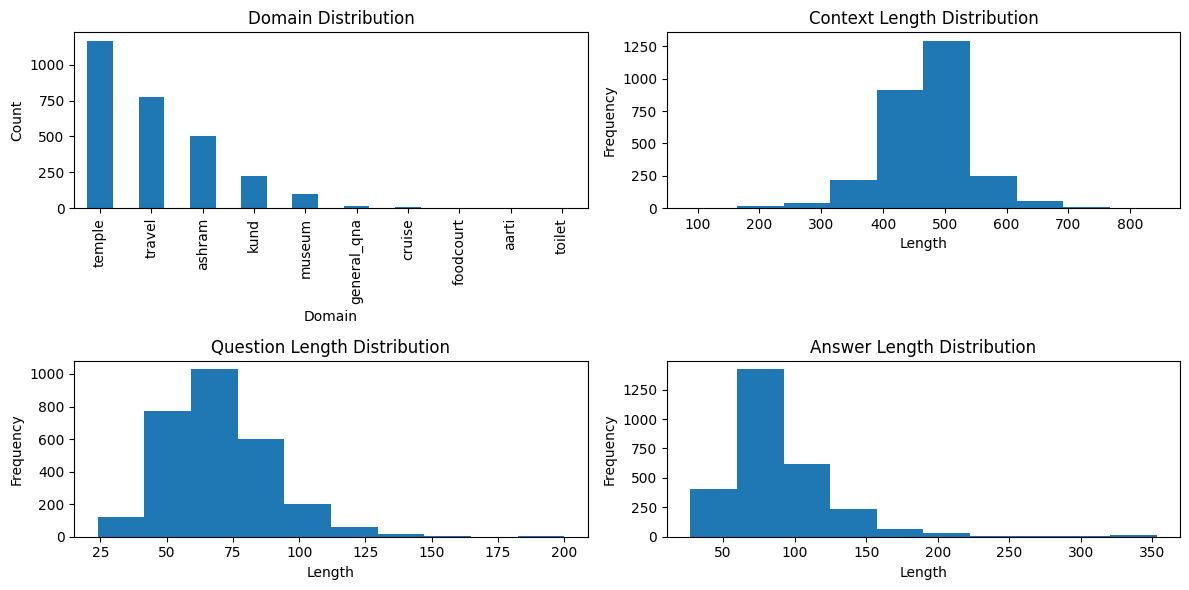

In [15]:
# Plot graphs
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
domain_dist.plot(kind='bar')
plt.title('Domain Distribution')
plt.xlabel('Domain')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
plt.hist(context_len, bins=10)
plt.title('Context Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(question_len, bins=10)
plt.title('Question Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(answer_len, bins=10)
plt.title('Answer Length Distribution')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [16]:
len(df['Question']), len(set(df['Context']))

(2798, 1134)